In [89]:
import pandas as pd
import seaborn as sns
import numpy as np

In [82]:
dfa = pd.read_csv("volumes_v3.csv")
dfb = pd.read_csv("volumes_v3_2.csv")
df = pd.concat([dfa, dfb], axis = 0, ignore_index = True)

In [97]:
df[np.isnan(df.volume)]

,Unnamed: 0,cow,filename,volume,lf_vol,rf_vol,lb_vol,rb_vol
19334,13577,785,785_20231117_125124_frame_414,NaN,NaN,NaN,NaN,NaN


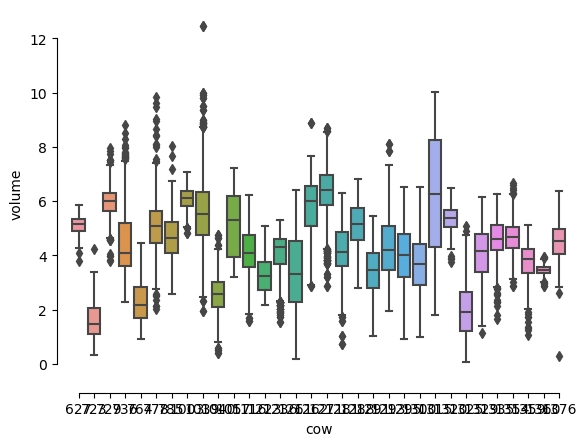

In [83]:
sns.boxplot(x="cow", y="volume",data = df)
sns.despine(offset=10, trim=True)

In [93]:
df2 = pd.melt(df, id_vars = "cow", value_vars = ["volume", "lf_vol", "rf_vol", "lb_vol", "rb_vol"]).reset_index()
grouped = df2[["cow", "variable", "value"]].groupby(["cow", "variable"]).agg([np.nanmedian, np.nanmin,np.nanmax,np.nanmean])
grouped.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in grouped.columns]
grouped = grouped.reset_index()
grouped

,cow,variable,value_nanmedian,value_nanmin,value_nanmax,value_nanmean
0,627,lb_vol,NaN,NaN,NaN,NaN
1,627,lf_vol,NaN,NaN,NaN,NaN
2,627,rb_vol,NaN,NaN,NaN,NaN
3,627,rf_vol,NaN,NaN,NaN,NaN
4,627,volume,5.143261,3.804259,5.875717,5.116780
...,...,...,...,...,...,...
155,1376,lb_vol,NaN,NaN,NaN,NaN
156,1376,lf_vol,NaN,NaN,NaN,NaN
157,1376,rb_vol,NaN,NaN,NaN,NaN
158,1376,rf_vol,NaN,NaN,NaN,NaN


In [85]:
grouped2 = pd.melt(grouped, id_vars = ["cow", "variable"], value_vars = ["value_median", "value_min","value_max", "value_mean"], var_name = "measure")

In [86]:
grouped

,cow,variable,value_median,value_min,value_max,value_mean
0,627,lb_vol,NaN,NaN,NaN,NaN
1,627,lf_vol,NaN,NaN,NaN,NaN
2,627,rb_vol,NaN,NaN,NaN,NaN
3,627,rf_vol,NaN,NaN,NaN,NaN
4,627,volume,5.143261,3.804259,5.875717,5.116780
...,...,...,...,...,...,...
155,1376,lb_vol,NaN,NaN,NaN,NaN
156,1376,lf_vol,NaN,NaN,NaN,NaN
157,1376,rb_vol,NaN,NaN,NaN,NaN
158,1376,rf_vol,NaN,NaN,NaN,NaN


C:\Users\marie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


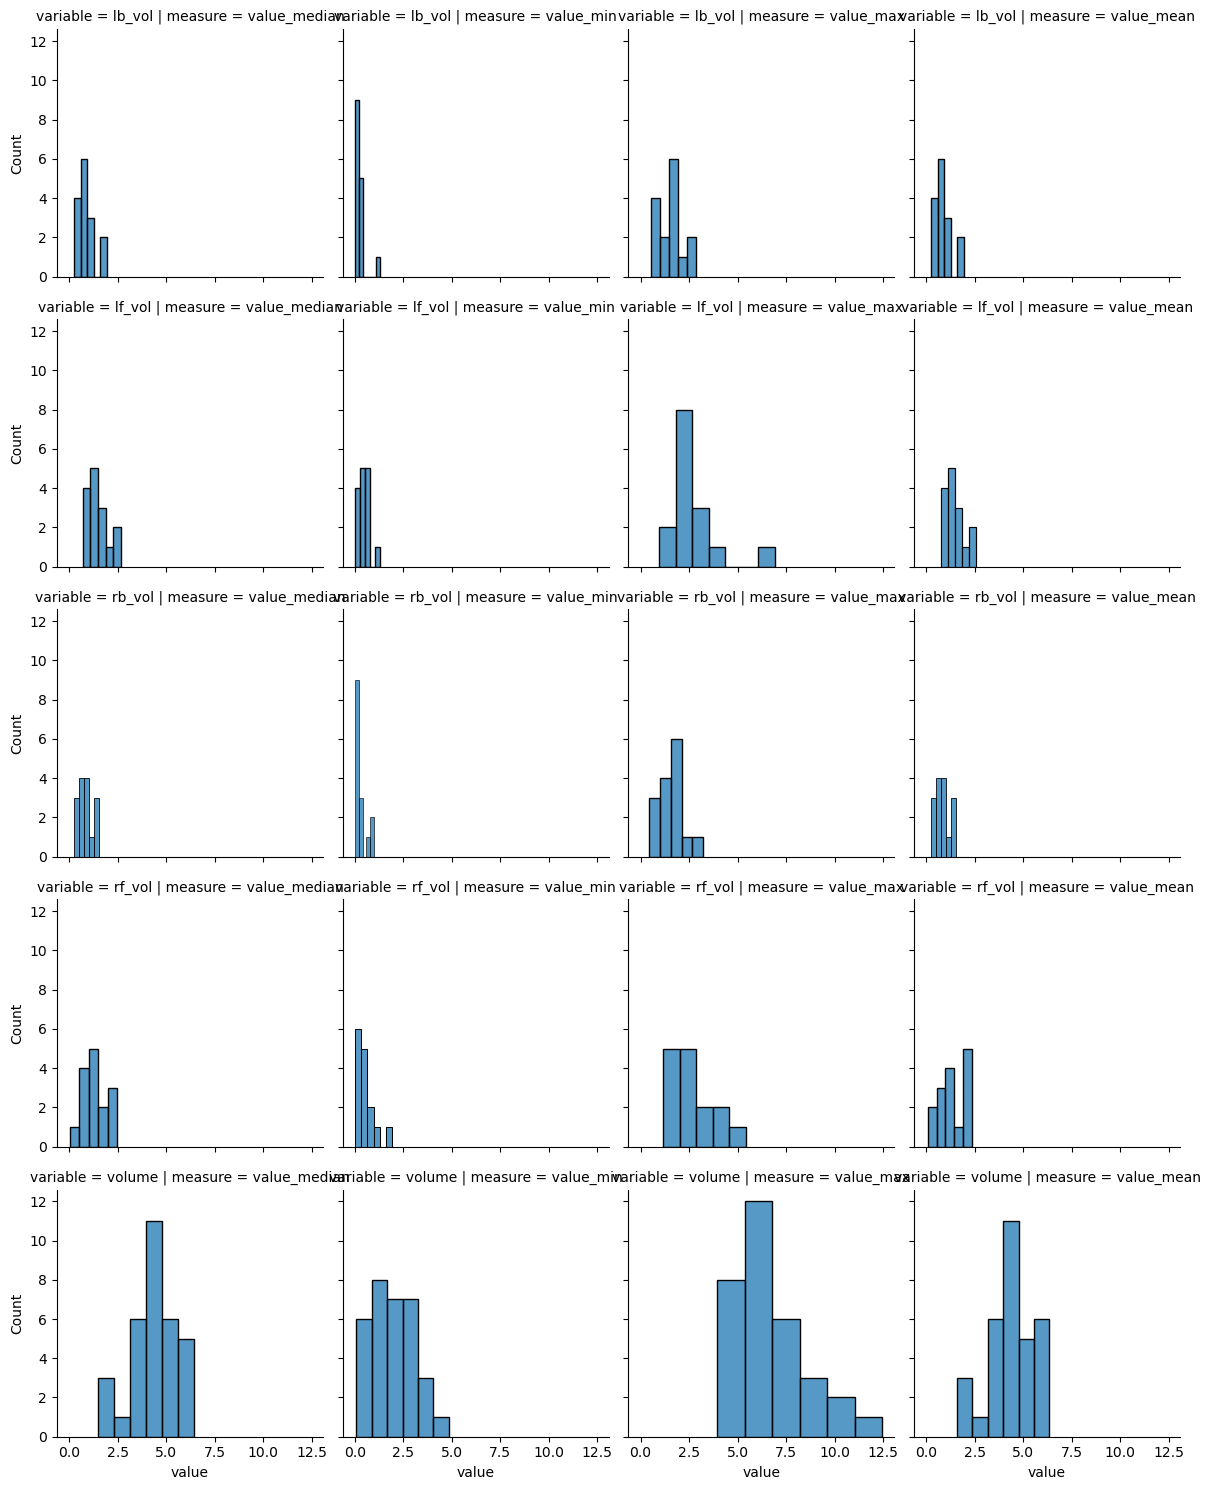

In [87]:
g = sns.FacetGrid(grouped2,row="variable", col = "measure")
g.map_dataframe(sns.histplot, x="value")
